In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.8.0'

In [ ]:
tf.keras.__version__

'2.8.0'

Keras is a High level API for tensorflow

In [ ]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(X_train_full, y_train_full),(X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train_full[0].shape

(28, 28)

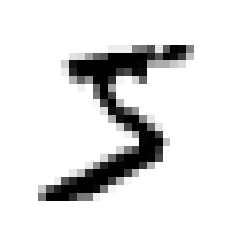

In [ ]:
img = X_train_full[0]

plt.imshow(img, cmap="binary")
plt.axis("off")
plt.show()

In [ ]:
y_train_full.shape

(60000,)

In [ ]:
y_train_full[0]

5

In [ ]:
img.max(), img.min()

(255, 0)

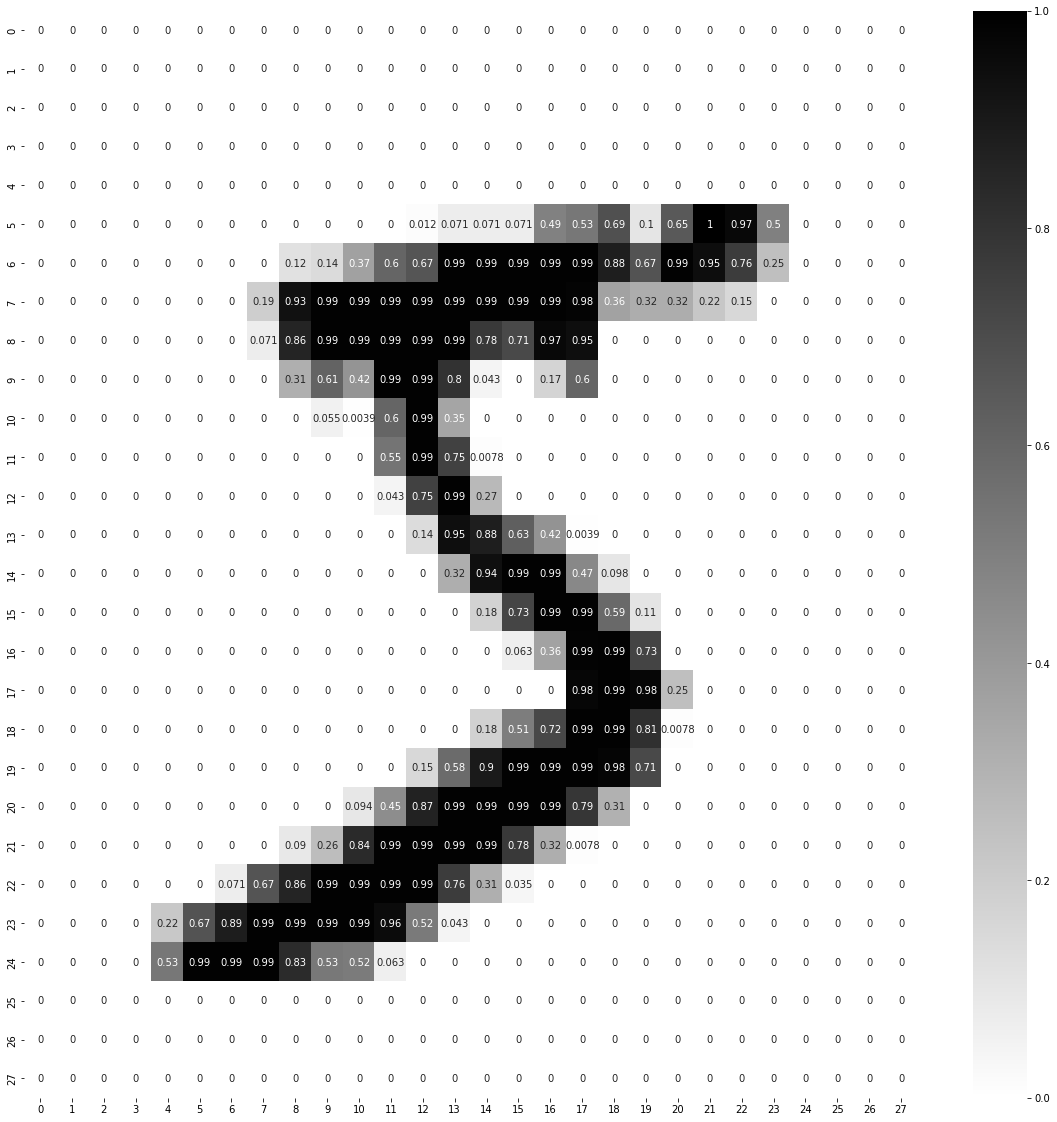

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(img/255, annot=True, cmap="binary")

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


X_test = X_test / 255.

In [ ]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")
]

In [ ]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [ ]:
model_clf.layers

In [ ]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# firstlayer * secondlayer + bias

784*300 + 300, 300*100 + 100, 100*10 + 10

(235500, 30100, 1010)

In [ ]:
np.sum((235500, 30100, 1010))

266610

In [ ]:
model_clf.layers[1].name

'hiddenLayer1'

In [ ]:
weights, biases = model_clf.layers[1].get_weights()

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases.shape

(300,)

In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]


model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

# By default batch_size = 32
# 55000/32

In [ ]:
55000/32 ,55000/16

(1718.75, 3437.5)

In [ ]:
EPOCHS = 30
VALIDATION = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION)

Epoch 1/30
1719/1719 [==============================] - 8s 3ms/step - loss: 0.6126 - accuracy: 0.8441 - val_loss: 0.3087 - val_accuracy: 0.9162
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2907 - accuracy: 0.9178 - val_loss: 0.2398 - val_accuracy: 0.9316
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2388 - accuracy: 0.9320 - val_loss: 0.2033 - val_accuracy: 0.9418
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2043 - accuracy: 0.9419 - val_loss: 0.1781 - val_accuracy: 0.9492
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1779 - accuracy: 0.9492 - val_loss: 0.1604 - val_accuracy: 0.9542
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1577 - accuracy: 0.9545 - val_loss: 0.1451 - val_accuracy: 0.9602
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1406 - accuracy: 0.9599 - val_loss: 0.1341 - val_accuracy:

In [ ]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [ ]:
type(history.history)

dict

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.612621,0.844055,0.308711,0.9162
1,0.290701,0.917818,0.239787,0.9316
2,0.238763,0.932018,0.203292,0.9418
3,0.204273,0.941909,0.178091,0.9492
4,0.177852,0.949200,0.160420,0.9542
5,0.157675,0.954509,0.145147,0.9602
6,0.140553,0.959927,0.134105,0.9624
7,0.127631,0.963709,0.123927,0.9646
8,0.116340,0.967473,0.115425,0.9674
9,0.106371,0.969036,0.109741,0.9698


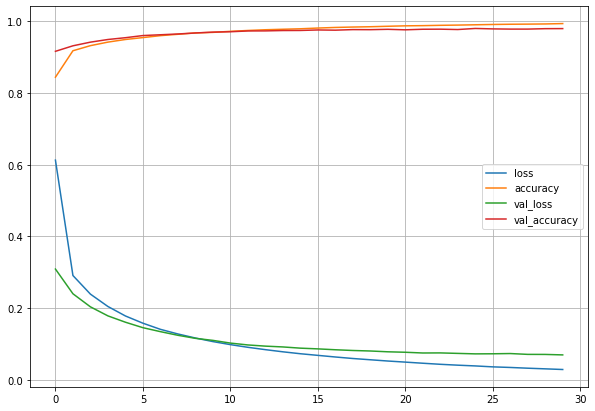

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [ ]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0691 - accuracy: 0.9785


[0.0691002905368805, 0.9785000085830688]

In [ ]:
10000/32

312.5

In [ ]:
X_new = X_test[:3]

y_prob = model_clf.predict(X_new)

y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001,
        0.   ]], dtype=float32)

In [ ]:
y_prob.shape

(3, 10)

In [ ]:
y_prob

array([[1.0254463e-06, 5.6015153e-08, 7.0433140e-05, 1.6346409e-04,
        2.6933979e-09, 1.0184111e-07, 1.6236956e-11, 9.9975556e-01,
        3.4382742e-06, 5.8793080e-06],
       [5.3548086e-07, 2.9022404e-04, 9.9965096e-01, 4.6661175e-05,
        9.9338171e-10, 1.1662974e-06, 1.9306167e-06, 1.6399148e-11,
        8.4354997e-06, 1.1177063e-11],
       [1.5672765e-06, 9.9796474e-01, 2.4029476e-04, 6.7488130e-05,
        2.1377965e-04, 3.2077456e-05, 2.2436470e-05, 4.3841026e-04,
        1.0051843e-03, 1.4180184e-05]], dtype=float32)

In [ ]:
Y_pred= np.argmax(y_prob, axis=-1)
Y_pred

array([7, 2, 1])

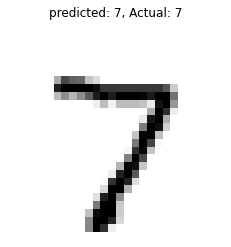

------------------------------------------------------------


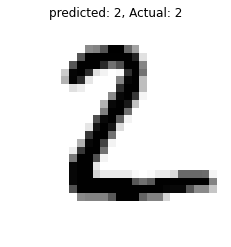

------------------------------------------------------------


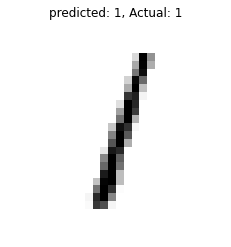

------------------------------------------------------------


In [ ]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
  plt.imshow(img_array, cmap="binary")
  plt.title(f"predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("---"*20)

In [ ]:
model_clf.save("model.h5")

In [ ]:
a = (1,2,3)

b = (5,6,7)

for i, j in zip(a,b):
  print(i+j)

6
8
10


# Convert this code into modular python script -

file1 = creating model

file2 = getting the dataset

main_file = train on the dataset and save the model